In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # modelo de regresión lineal
from sklearn.model_selection import train_test_split # separar datos de entrenamiento y testeo
from sklearn.metrics import mean_squared_error,r2_score # evaluar modelos de regresión

In [2]:
df=pd.read_csv('conjunto de datos\ALERTA.csv', sep=';')
df

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\oswal\AppData\Local\Temp\ipykernel_18016\2524239014.py:1: SyntaxWarning: invalid escape sequence '\A'
  df=pd.read_csv('conjunto de datos\ALERTA.csv', sep=';')


,UDI,Producto ID,Nombre_Producto,Tipo,Temperatura_Aire,Temperatura_Proceso,Velocidad_Rotacion,Torque,Desgaste_Herramientas,Objetivo,Tipo_de_falla
0,1,M14860,Producto 7004,Medio,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,Producto 1004,Bajo,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,Producto 1005,Bajo,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,Producto 1006,Bajo,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,Producto 1007,Bajo,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,Producto 9998,Medio,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,Producto 1002,Alto,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,Producto 9999,Medio,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,Producto 1003,Alto,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Producto ID            10000 non-null  object 
 2   Nombre_Producto        10000 non-null  object 
 3   Tipo                   10000 non-null  object 
 4   Temperatura_Aire       10000 non-null  float64
 5   Temperatura_Proceso    10000 non-null  float64
 6   Velocidad_Rotacion     10000 non-null  int64  
 7   Torque                 10000 non-null  float64
 8   Desgaste_Herramientas  10000 non-null  int64  
 9   Objetivo               10000 non-null  int64  
 10  Tipo_de_falla          10000 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [4]:
# Seleccionar solo las columnas con tipos de datos numéricos
df_Alerta = df.select_dtypes(include=['number'])


In [5]:
# correlación
df_Alerta = df.select_dtypes(include='number')
df_Alerta.corr()

,UDI,Temperatura_Aire,Temperatura_Proceso,Velocidad_Rotacion,Torque,Desgaste_Herramientas,Objetivo
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Temperatura_Aire,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Temperatura_Proceso,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Velocidad_Rotacion,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Desgaste_Herramientas,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Objetivo,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


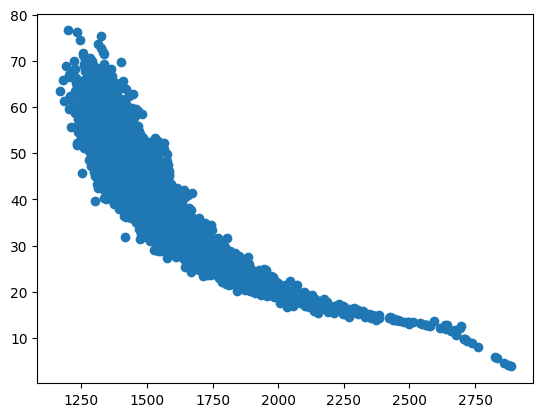

In [6]:
# grafico de dispersión

plt.scatter(df['Velocidad_Rotacion'],df['Torque'])
plt.show()

In [7]:
# seleccionar las variables
x=df['Velocidad_Rotacion'].values.reshape(-1,1)# debe quedar los datos en n filas y 1 columna
x


array([[1551],
       [1408],
       [1498],
       ...,
       [1645],
       [1408],
       [1500]], shape=(10000, 1))

In [8]:
y=df['Torque'].values # array con los valores de la columna
y

array([42.8, 46.3, 49.4, ..., 33.4, 48.5, 40.2], shape=(10000,))

In [9]:
# dividir los datos en datos de entrenamiento y datos de testeo
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [10]:
# aplicar el modelo

modelo=LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

In [11]:
modelo.coef_

array([-0.04839236])

In [12]:
#modelo.coef_
print(round(modelo.coef_[0],3))# pendiente = a
print(round(modelo.intercept_,3))# intercepto = b
print(f'Ecuacion de la recta: y={round(modelo.coef_[0],3)}x + {round(modelo.intercept_,3)})')

-0.048
114.531
Ecuacion de la recta: y=-0.048x + 114.531)


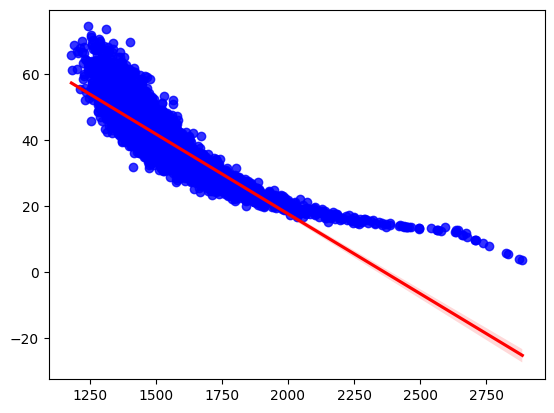

In [13]:
# grafico con intervalo de confianza

sns.regplot(x=x_train,y=y_train,ci=95, line_kws={'color':'red'},scatter_kws={'color':'blue'})
plt.show()

In [14]:
y_prediccion=modelo.predict(x_test) # predecir en base al modelo entrenado
y_prediccion
print(f"predicciones {y_prediccion}")
print(f"Valor real {y_test}")

predicciones [40.10309014 45.76499659 42.66788537 ... 45.28107296 39.95791305
 36.42527056]
Valor real [36.1 44.8 42.  ... 45.4 36.2 33.2]


In [ ]:
y_p=modelo.predict([[30],[308]]) #si trabajo 30 horas,la temperatura del proceso ascendera 99 grados
y_p
                   
                   

array([113.07877325,  99.62569639])

In [16]:
#evaluar el modelo

evalua1=modelo.score(x_test,y_test)
print(evalua1)

#error cuadratico medio
mse=mean_squared_error(y_test,y_prediccion)
print(f'MSE: {mse}')
r2=np.sqrt(mse)
print(f'R2: {r2}')


0.7625406042584145
MSE: 23.03579021221963
R2: 4.799561460406527
